# Playing with Attention Maps

In [1]:
from typing import Literal
import sys

import jax

platform : Literal["darwin", "colab", "cuda"] = "darwin"

try:
    import google.colab
    platform = "colab"
except ImportError:
    devices = jax.devices()
    if any(d.platform == "gpu" for d in devices):
        platform = "cuda"

print(f"Running on {platform}")

if platform == "colab":
    !git clone https://github.com/novastar53/jaxpt
    !cd jaxpt && git checkout main && git pull
    !pip install tiktoken --quiet
    !pip uninstall -y tensorflow

Running on darwin


In [18]:
import jax
import jax.numpy as jnp

from jaxpt.modules.attention import calc_vanilla_attn

key = jax.random.key(42)

B, T, C, nh = 1, 3, 8, 2 


mask = jnp.tril(jnp.ones((1, 1, T, T)))

q = jax.random.uniform(key, (B, T, nh, C), minval=0, maxval=1)
key, subkey = jax.random.split(key)
k = jax.random.uniform(subkey, (B, T, nh, C), minval=0, maxval=1)
key, subkey = jax.random.split(key)
v = jax.random.uniform(subkey, (B, T, nh, C), minval=0, maxval=1)

_, att = calc_vanilla_attn(q, k, v, mask)

print(att.shape)

(1, 2, 3, 3)


## Query and Key Position or Frequency Usage

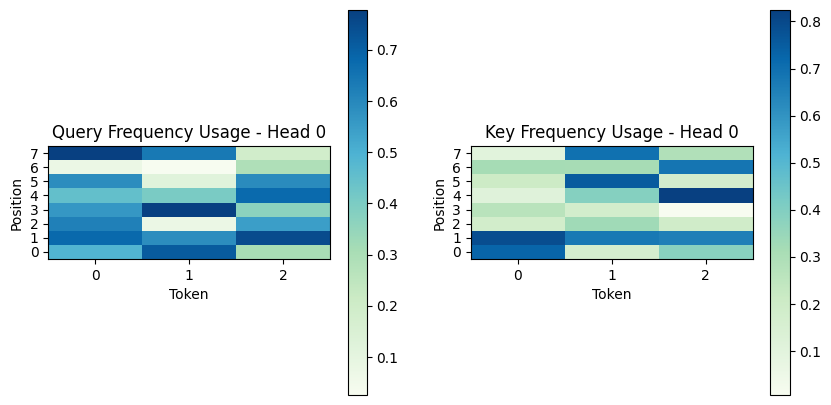

In [77]:
import matplotlib.pyplot as plt

attention_head = 0

fig, axs = plt.subplots(1, 2, figsize=(10,5))

query_usage = jnp.mean(q, axis=0)
data = query_usage[:, attention_head, :].T

im = axs[0].imshow(data, origin="lower", cmap="GnBu", aspect=0.15)
axs[0].set_yticks(list(range(data.shape[-2])))
axs[0].set_xticks(list(range(data.shape[-1])))
axs[0].set_xlabel("Token")
axs[0].set_ylabel("Position")
axs[0].set_title(f"Query Frequency Usage - Head {attention_head}")
fig.colorbar(im, ax=axs[0])

key_usage = jnp.mean(k, axis=0)
data = key_usage[:, attention_head, :].T

im = axs[1].imshow(data, origin="lower", cmap="GnBu", aspect=0.15)
axs[1].set_yticks(list(range(data.shape[-2])))
axs[1].set_xticks(list(range(data.shape[-1])))
axs[1].set_xlabel("Token")
axs[1].set_ylabel("Position")
axs[1].set_title(f"Key Frequency Usage - Head {attention_head}")
fig.colorbar(im, ax=axs[1])

plt.show()

## Attention Patterns

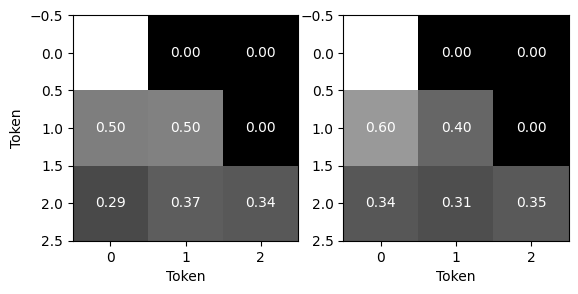

In [23]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn-v0_8-darkgrid')

fig, axes = plt.subplots(1, att.shape[1])

for a in range(att.shape[1]):
    for i in range(att.shape[2]):
        for j in range(att.shape[3]):
            axes[a].text(j, i,            # x, y position
                    f"{att[0, a, i, j]:.2f}",  # text to display
                    ha="center",    # horizontal alignment
                    va="center",    # vertical alignment
                    color="w")      # choose a contrasting color

    axes[a].imshow(att[0, a, :, :], cmap="gray")
    axes[a].set_xlabel("Token")
    axes[a].set_ylabel("Token")


plt.show()